In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
data = pd.read_csv("matala2_cosmetics_2019-Nov.csv",low_memory=False)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1.487580e+18,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1.487580e+18,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1.784000e+18,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1.487580e+18,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1.487580e+18,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


## Q1

In [4]:
data['event_time']= pd.to_datetime(data['event_time'])
data.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                  float64
category_code                 object
brand                         object
price                         object
user_id                        int64
user_session                  object
dtype: object

In [5]:
data = data.sort_values(by=['user_session','event_time'],ascending = True)

In [6]:
data['duration_to_next_event'] = (data['event_time'].shift(-1)-data['event_time']).dt.seconds
data.loc[data['user_session'].shift(-1) != data['user_session'], 'duration_to_next_event'] = None
data['duration_to_next_event'] = data['duration_to_next_event'].fillna(0)
data.head(15)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
522763,2019-11-05 07:57:05+00:00,view,5829298,1.487580e+18,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,0.0
284392,2019-11-03 12:45:44+00:00,view,5846437,1.487580e+18,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,11.0
284416,2019-11-03 12:45:55+00:00,view,5846436,1.487580e+18,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,0.0
144335,2019-11-02 09:13:51+00:00,view,5887753,1.487580e+18,NaN,NaN,3.56,557616099,0000d358-49a1-4a54-b402-08205c35981c,0.0
853411,2019-11-07 11:18:15+00:00,view,59996,1.487580e+18,NaN,NaN,4.13,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,71.0
853644,2019-11-07 11:19:26+00:00,view,5739492,1.487580e+18,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,100.0
854008,2019-11-07 11:21:06+00:00,view,5739493,1.487580e+18,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,1403.0
858969,2019-11-07 11:44:29+00:00,view,5739493,1.487580e+18,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,11.0
859006,2019-11-07 11:44:40+00:00,cart,5739493,1.487580e+18,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,29.0
859115,2019-11-07 11:45:09+00:00,view,5739493,1.487580e+18,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,6.0


## Q2

In [7]:
data = data.sort_values(by=['user_id','event_time'])
data['event_date'] = data['event_time'].dt.date

In [8]:
data['days_between'] = (data.groupby('user_id')['event_date'] .diff().apply(pd.Timedelta).dt.days.fillna(0))
data['days_between'].fillna(0, inplace=True)
data.loc[data['user_id'].shift(1) !=data['user_id'], 'funnel_number']=1

In [9]:
data['funnel_number'] = data.groupby('user_id')['days_between'].apply(lambda x: (x > 5).cumsum() + 1)
data['funnel_number'] = data['funnel_number'].fillna(1)


C:\Users\mikha\AppData\Local\Temp\ipykernel_16956\3679158978.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['funnel_number'] = data.groupby('user_id')['days_between'].apply(lambda x: (x > 5).cumsum() + 1)


In [10]:
data.loc[data['user_id']==566868248].head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,event_date,days_between,funnel_number
198249,2019-11-02 17:44:31+00:00,remove_from_cart,5570246,1.487580e+18,NaN,NaN,5.56,566868248,0fdcfefc-b009-444f-9982-3376efe0bb11,3.0,2019-11-02,0.0,1
198255,2019-11-02 17:44:34+00:00,remove_from_cart,5819226,1.487580e+18,NaN,ingarden,4.44,566868248,0fdcfefc-b009-444f-9982-3376efe0bb11,54.0,2019-11-02,0.0,1
198370,2019-11-02 17:45:28+00:00,cart,5814046,1.487580e+18,NaN,grattol,6.27,566868248,0fdcfefc-b009-444f-9982-3376efe0bb11,37.0,2019-11-02,0.0,1
198481,2019-11-02 17:46:05+00:00,cart,5712452,1.487580e+18,NaN,NaN,0.71,566868248,0fdcfefc-b009-444f-9982-3376efe0bb11,20.0,2019-11-02,0.0,1
198568,2019-11-02 17:46:25+00:00,cart,5700046,1.487580e+18,NaN,runail,0.4,566868248,0fdcfefc-b009-444f-9982-3376efe0bb11,0.0,2019-11-02,0.0,1
1010683,2019-11-08 07:33:44+00:00,remove_from_cart,5724230,1.487580e+18,NaN,NaN,18.25,566868248,1f8d2025-8181-4506-9b47-386953797020,0.0,2019-11-08,6.0,2
1010684,2019-11-08 07:33:44+00:00,remove_from_cart,5724230,1.487580e+18,NaN,NaN,18.25,566868248,1f8d2025-8181-4506-9b47-386953797020,74.0,2019-11-08,0.0,2
1010877,2019-11-08 07:34:58+00:00,cart,5565814,1.487580e+18,NaN,NaN,0.71,566868248,1f8d2025-8181-4506-9b47-386953797020,51.0,2019-11-08,0.0,2
1010986,2019-11-08 07:35:49+00:00,view,5712451,1.487580e+18,NaN,NaN,7.94,566868248,1f8d2025-8181-4506-9b47-386953797020,213.0,2019-11-08,0.0,2
1011478,2019-11-08 07:39:22+00:00,view,5599264,1.487580e+18,NaN,NaN,7.14,566868248,1f8d2025-8181-4506-9b47-386953797020,97.0,2019-11-08,0.0,2


## Q3

In [11]:
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number']).cumcount() + 1

In [12]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,event_date,days_between,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1.487580e+18,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,2019-11-04,0.0,1,1
697519,2019-11-06 10:40:34+00:00,cart,5614842,1.487580e+18,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,2019-11-06,0.0,1,1
697645,2019-11-06 10:41:26+00:00,cart,5766379,1.784000e+18,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,2019-11-06,0.0,1,2
698043,2019-11-06 10:43:30+00:00,purchase,5766379,1.784000e+18,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,2019-11-06,0.0,1,3
698045,2019-11-06 10:43:30+00:00,purchase,5614842,1.487580e+18,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,2019-11-06,0.0,1,4


## Q4

In [13]:
data['price'] = data['price'].replace('[^0-9\.]+', '',regex= True)
data['price'] = data['price'].astype(float)

## Q5

In [14]:
unique_names = data['event_type'].unique()
unique_names

array(['view', 'cart', 'purchase', 'remove_from_cart'], dtype=object)

In [15]:
def sum_func(pct):
    total = int(pct/100.*grouped.sum())
    return "({:d})".format( total)

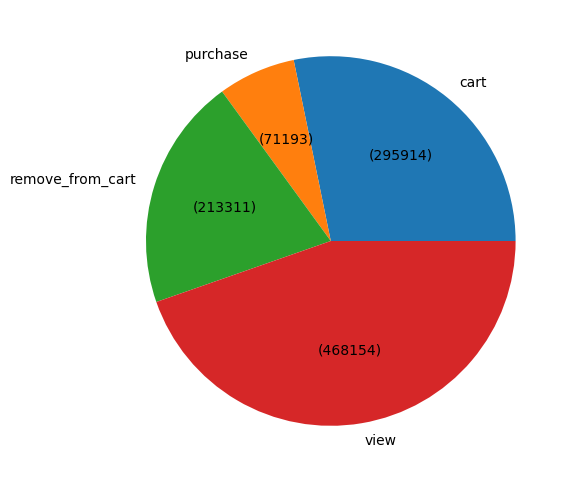

In [16]:
grouped = data.groupby('event_type').size()

grouped.plot(kind='pie', figsize=(6, 6), autopct=sum_func)

plt.show()

<Axes: >

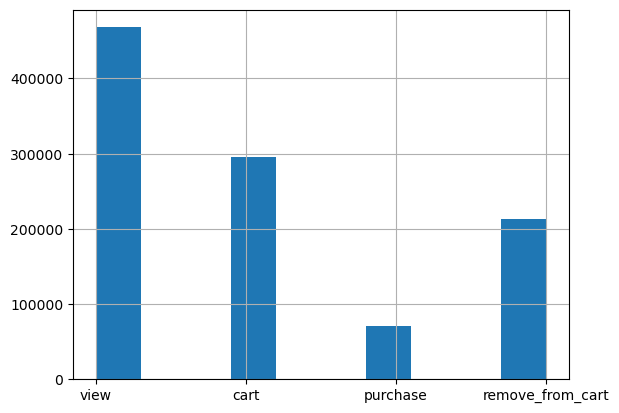

In [17]:
data.event_type.hist()

## Q6

In [18]:
grouped = data.groupby(['user_id', 'user_session', 'funnel_number'])
session_data = pd.DataFrame()
session_data['user_id'] = grouped['user_id'].first()
session_data['user_session'] = grouped['user_session'].first()
session_data['funnel_number'] = grouped['funnel_number'].first()
session_data['index_in_funnel'] = grouped['index_in_funnel'].apply(list)
session_data['total_events'] = data.groupby(['user_id', 'user_session'])['user_session'].count()
session_data['duration of visit'] = data.groupby(['user_id','user_session'])['duration_to_next_event'].sum()
view_sort = data[data['event_type'] == 'view']
session_data['list_of_viewed'] = view_sort.groupby(['user_id', 'user_session'])['product_id'].apply(list)
cart_sort = data[data['event_type'] == 'cart']
session_data['list_of_added_to_cart'] = cart_sort.groupby(['user_id', 'user_session'])['product_id'].apply(list)
purchase_sort = data[data['event_type'] == 'purchase']
session_data['list_of_purchased '] = cart_sort.groupby(['user_id', 'user_session'])['product_id'].apply(list)

In [19]:
session_data.head()

user_id  \
user_id  user_session                         funnel_number             
1120748  d0484d94-7ac1-44e8-a310-2360da11ad9d 1               1120748   
10079204 f873d16b-4efa-4e92-81be-92948aef2ff5 1              10079204   
10521214 25d2d492-d688-4baa-adf1-7296dbdd663e 1              10521214   
11274156 0c778a88-4700-4e8b-becb-3371ec28ea79 1              11274156   
         7bcf0afd-33ab-49ca-bd55-9c11a817b3d2 1              11274156   

                                                                                     user_session  \
user_id  user_session                         funnel_number                                         
1120748  d0484d94-7ac1-44e8-a310-2360da11ad9d 1              d0484d94-7ac1-44e8-a310-2360da11ad9d   
10079204 f873d16b-4efa-4e92-81be-92948aef2ff5 1              f873d16b-4efa-4e92-81be-92948aef2ff5   
10521214 25d2d492-d688-4baa-adf1-7296dbdd663e 1              25d2d492-d688-4baa-adf1-7296dbdd663e   
11274156 0c778a88-4700-4e8b-becb-3371ec28ea79 1              0c778a88-4700-4e8b-becb-3371ec28ea79   
         7bcf0afd-33ab-49ca-bd55-9c11a817b3d2 1              7bcf0afd-33ab-49ca-bd55-9c11a817b3d2   

                                                             funnel_number  \
user_id  user_session                         funnel_number                  
1120748  d0484d94-7ac1-44e8-a310-2360da11ad9d 1                          1   
10079204 f873d16b-4efa-4e92-81be-92948aef2ff5 1                          1   
10521214 25d2d492-d688-4baa-adf1-7296dbdd663e 1                          1   
11274156 0c778a88-4700-4e8b-becb-3371ec28ea79 1                          1   
         7bcf0afd-33ab-49ca-bd55-9c11a817b3d2 1                          1   

                                                            index_in_funnel  \
user_id  user_session                         funnel_number                   
1120748  d0484d94-7ac1-44e8-a310-2360da11ad9d 1                         [1]   
10079204 f873d16b-4efa-4e92-81be-92948aef2ff5 1                [1, 2, 3, 4]   
10521214 25d2d492-d688-4baa-adf1-7296dbdd663e 1                   [1, 2, 3]   
11274156 0c778a88-4700-4e8b-becb-3371ec28ea79 1                      [1, 2]   
         7bcf0afd-33ab-49ca-bd55-9c11a817b3d2 1                         [3]   

                                                             total_events  \
user_id  user_session                         funnel_number                 
1120748  d0484d94-7ac1-44e8-a310-2360da11ad9d 1                         1   
10079204 f873d16b-4efa-4e92-81be-92948aef2ff5 1                         4   
10521214 25d2d492-d688-4baa-adf1-7296dbdd663e 1                         3   
11274156 0c778a88-4700-4e8b-becb-3371ec28ea79 1                         2   
         7bcf0afd-33ab-49ca-bd55-9c11a817b3d2 1                         1   

                                                             duration of visit  \
user_id  user_session                         funnel_number                      
1120748  d0484d94-7ac1-44e8-a310-2360da11ad9d 1                            0.0   
10079204 f873d16b-4efa-4e92-81be-92948aef2ff5 1                          176.0   
10521214 25d2d492-d688-4baa-adf1-7296dbdd663e 1                          133.0   
11274156 0c778a88-4700-4e8b-becb-3371ec28ea79 1                           20.0   
         7bcf0afd-33ab-49ca-bd55-9c11a817b3d2 1                            0.0   

                                                                          list_of_viewed  \
user_id  user_session                         funnel_number                                
1120748  d0484d94-7ac1-44e8-a310-2360da11ad9d 1                                   [5240]   
10079204 f873d16b-4efa-4e92-81be-92948aef2ff5 1                                      NaN   
10521214 25d2d492-d688-4baa-adf1-7296dbdd663e 1              [5713294, 5713295, 5713294]   
11274156 0c778a88-4700-4e8b-becb-3371ec28ea79 1                                [5899834]   
         7bcf0afd-33ab-49ca-bd55-9c11a817b3d2 1                           